# Santander Customer Transaction Prediction

<img src="images/atm.png">

### Description

At Santander, our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

### What is the Problem Asking?

You are tasked with predicting whether or not a customer will make a **specific transaction** in the future. The problem is a **binary classification** task where:
- **1** means the customer **will make** the transaction.
- **0** means the customer **will not make** the transaction.

The goal is not to predict the amount of money transacted, but simply whether the transaction will occur or not.

### Dataset and Structure

- You are provided with a **train** and **test** dataset.
- The **train** dataset includes customer data along with a target label indicating whether the customer made the transaction (target: 0 or 1).
- The **test** dataset contains customer data without the target label, and your job is to predict whether the customers in the test set will make the transaction.

### Evaluation Metric

Submissions are evaluated based on the **ROC AUC (Receiver Operating Characteristic Area Under the Curve)** score.
- ROC AUC measures how well your model distinguishes between the two classes (0 or 1).
  - **0.5 AUC** means the model is making random predictions.
  - **1.0 AUC** means the model perfectly distinguishes between the two classes.

### Submission Format

After making predictions on the test set, you need to submit a **CSV file** in the following format:
```bash
ID_code,target
test_0,0
test_1,1
test_2,0
etc
```
Each row should include the ID_code from the test set and the predicted target (0 or 1) for that customer.

### Summary
Santander is asking you to predict whether a customer will make a specific financial transaction in the future. You will need to build a model based on the provided data, and your predictions will be evaluated using the ROC AUC metric.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

## EDA - Exploratory Data Analysis

In [3]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,...,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,...,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,12.4205,

In [4]:
df_train.isnull().any().sum()

0

In [5]:
df_test.isnull().any().sum()

0

In [6]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200

In [7]:
df_train.shape

(200000, 202)

In [8]:
df_test.shape

(200000, 201)

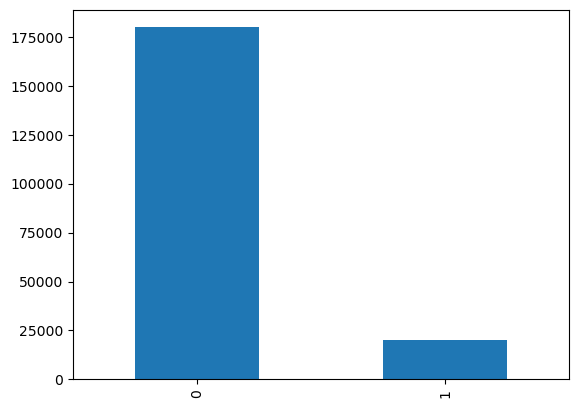

In [9]:
df_train['target'].value_counts().plot(kind = 'bar');

Looking at the graph, it's clear that the data is unbalanced. To address this, I will focus on using algorithms that are more robust to class imbalance or I will incorporate the `class_weight` parameter to balance the classes during model training.

## Modelling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
train = df_train.drop(['ID_code'],axis = 1)
test = df_test.drop(['ID_code'],axis = 1)

In [12]:
x = train.drop(['target'],axis = 1)
y = train['target']

In [13]:
from sklearn.preprocessing import normalize, scale
scaled_x = scale(x)
normalized_x = normalize(x)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(normalized_x,y,test_size = 0.2,random_state = 42)

### XGBClassifier

In [15]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred = xgb_model.predict(x_test)

In [17]:
print(confusion_matrix(y_test, y_pred))

[[31988  3915]
 [ 1650  2447]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     35903
           1       0.38      0.60      0.47      4097

    accuracy                           0.86     40000
   macro avg       0.67      0.74      0.69     40000
weighted avg       0.89      0.86      0.87     40000



In [19]:
print(accuracy_score(y_test, y_pred))

0.860875


AUC:  0.6677879039399442


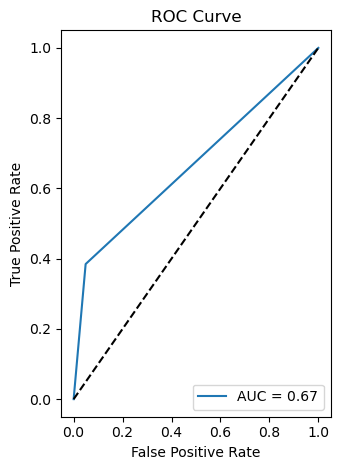

In [20]:
auc = roc_auc_score(y_pred, y_test)
print('AUC: ', auc )
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

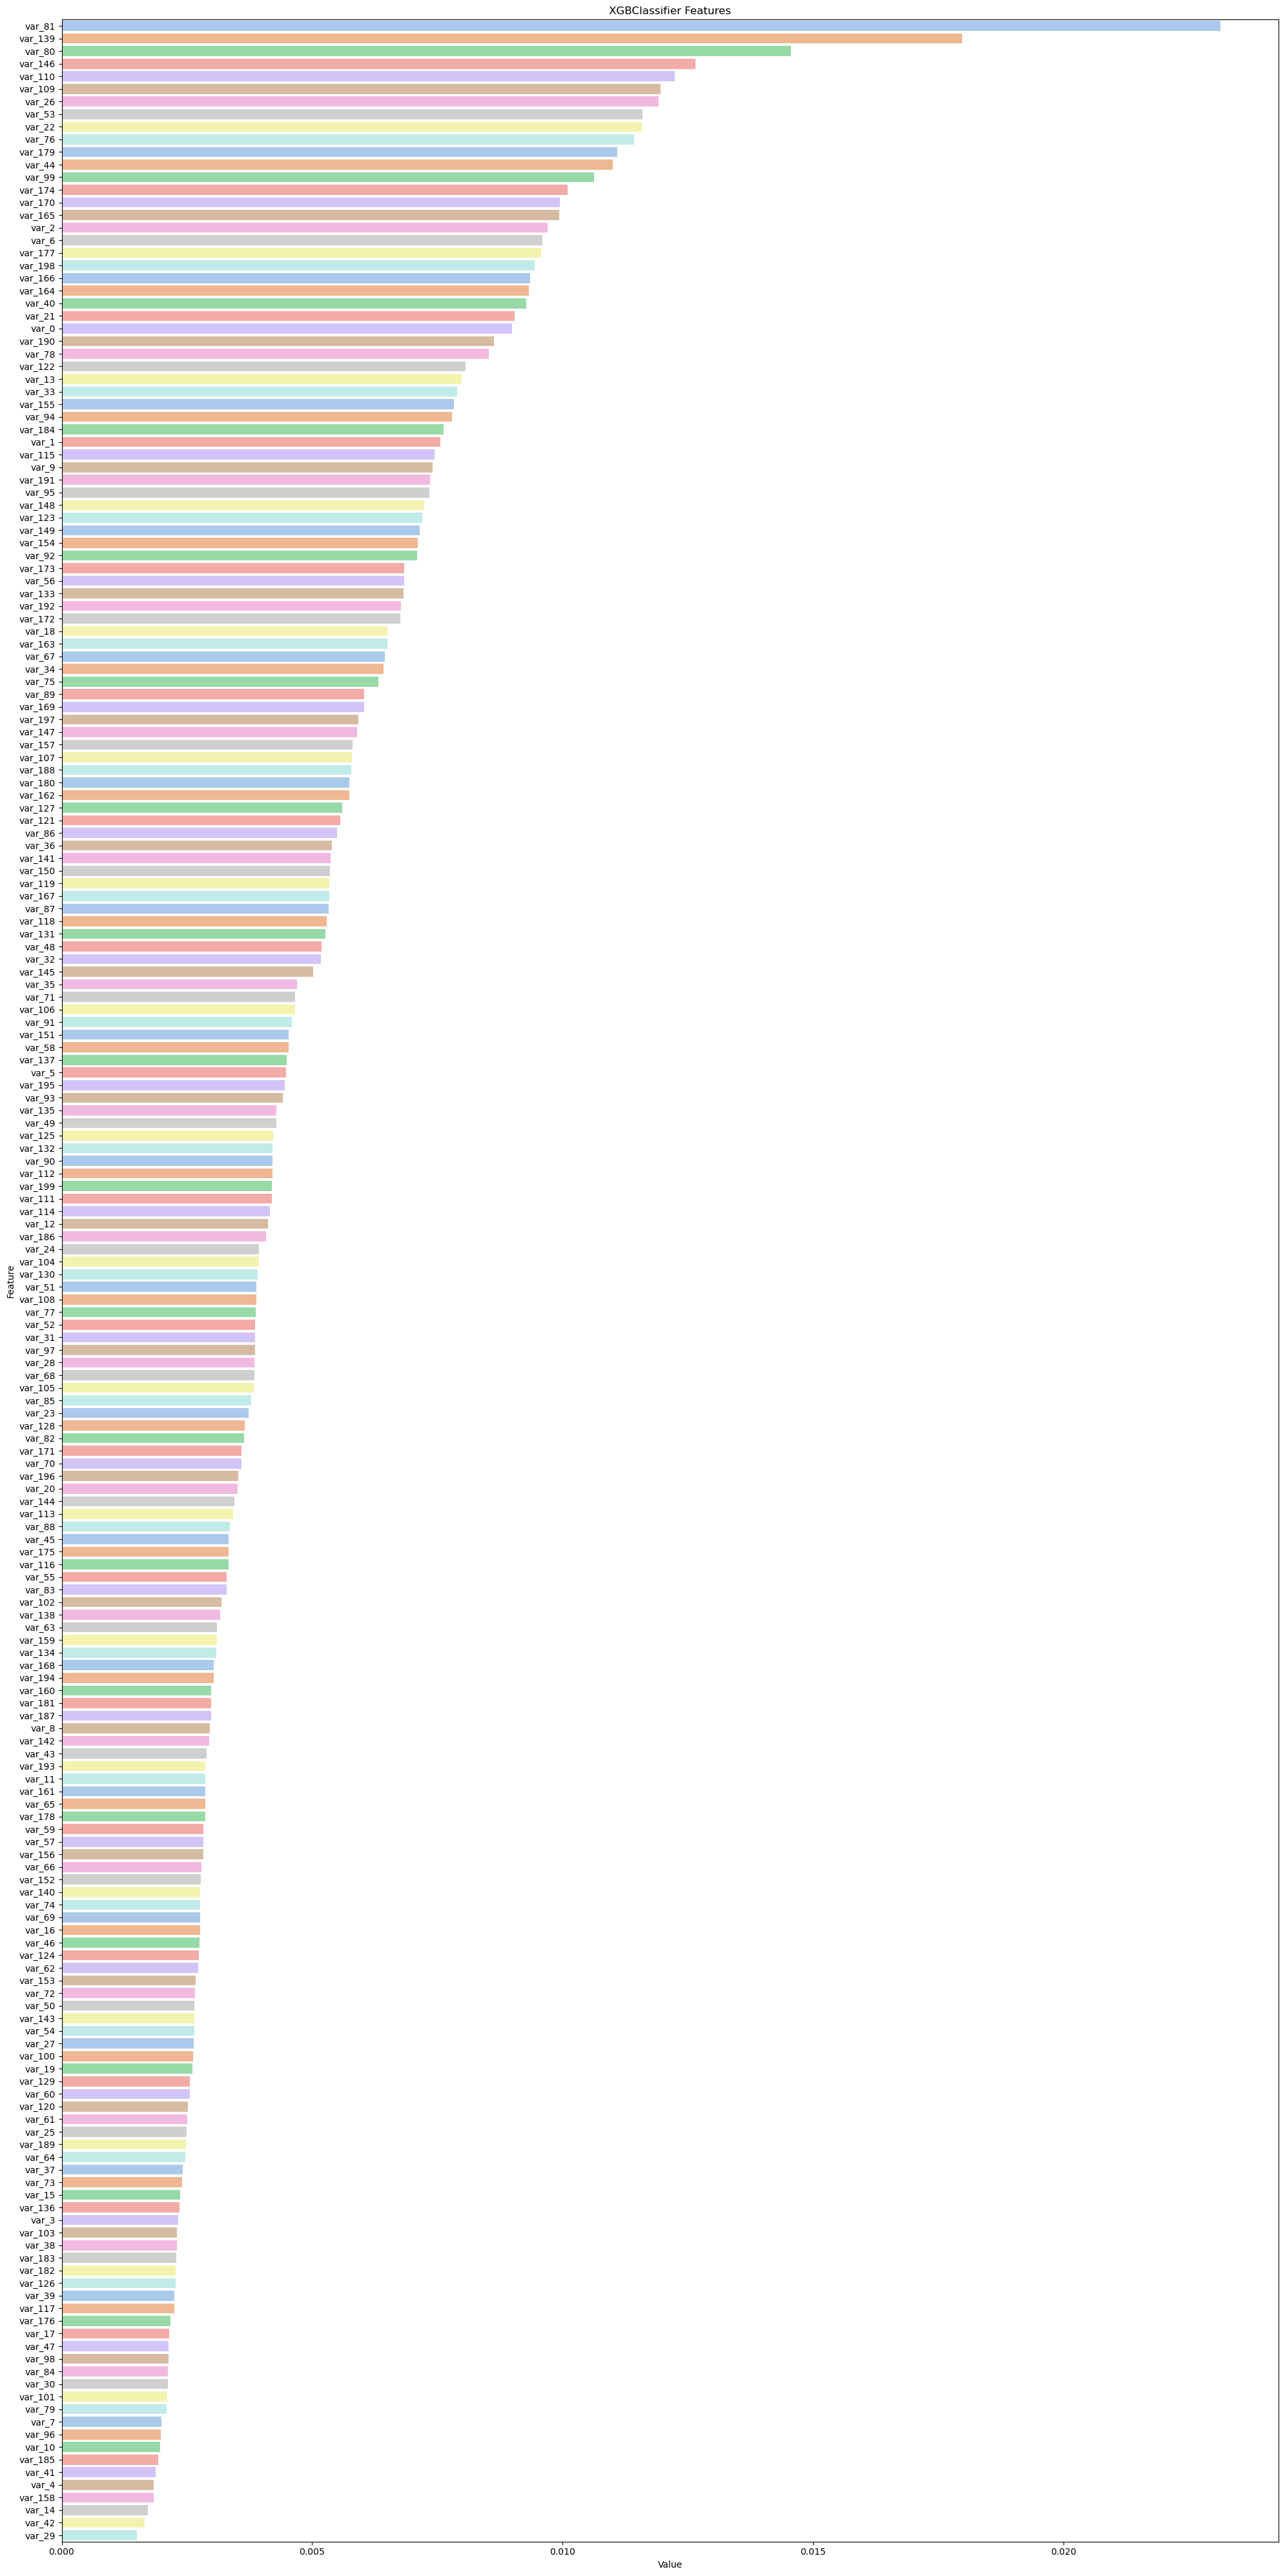

In [21]:

feature_imp = pd.DataFrame(sorted(zip(xgb_model.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,40))
sns.barplot(x="Value", y="Feature",palette='pastel' ,data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBClassifier Features')
plt.tight_layout()
plt.show()

In [22]:
feature_imp.loc[feature_imp.Value >= 0].sort_values(by=['Value'], ascending = False).head(50)

,Value,Feature
0,0.023133,var_81
1,0.017975,var_139
2,0.014562,var_80
3,0.012647,var_146
4,0.012243,var_110
5,0.011951,var_109
6,0.011917,var_26
7,0.011596,var_53
8,0.011584,var_22
9,0.011427,var_76


### LGBMClassifier

In [23]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier()
lgm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 16001, number of negative: 143999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100006 -> initscore=-2.197155
[LightGBM] [Info] Start training from score -2.197155


LGBMClassifier()

In [24]:
y_pred = lgm.predict(x_test)

In [25]:
print(confusion_matrix(y_test, y_pred))

[[35853    50]
 [ 3775   322]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.87      0.08      0.14      4097

    accuracy                           0.90     40000
   macro avg       0.89      0.54      0.55     40000
weighted avg       0.90      0.90      0.87     40000



In [27]:
print(accuracy_score(y_test, y_pred))

0.904375


AUC:  0.8851652356159596


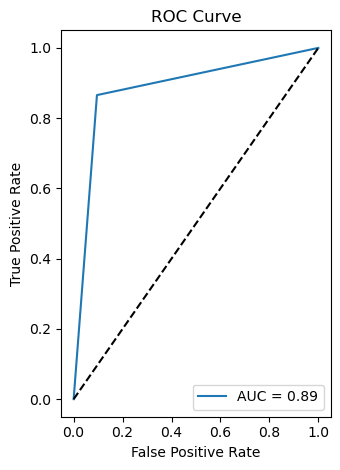

In [28]:
auc = roc_auc_score(y_pred, y_test)
print('AUC: ', auc )
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

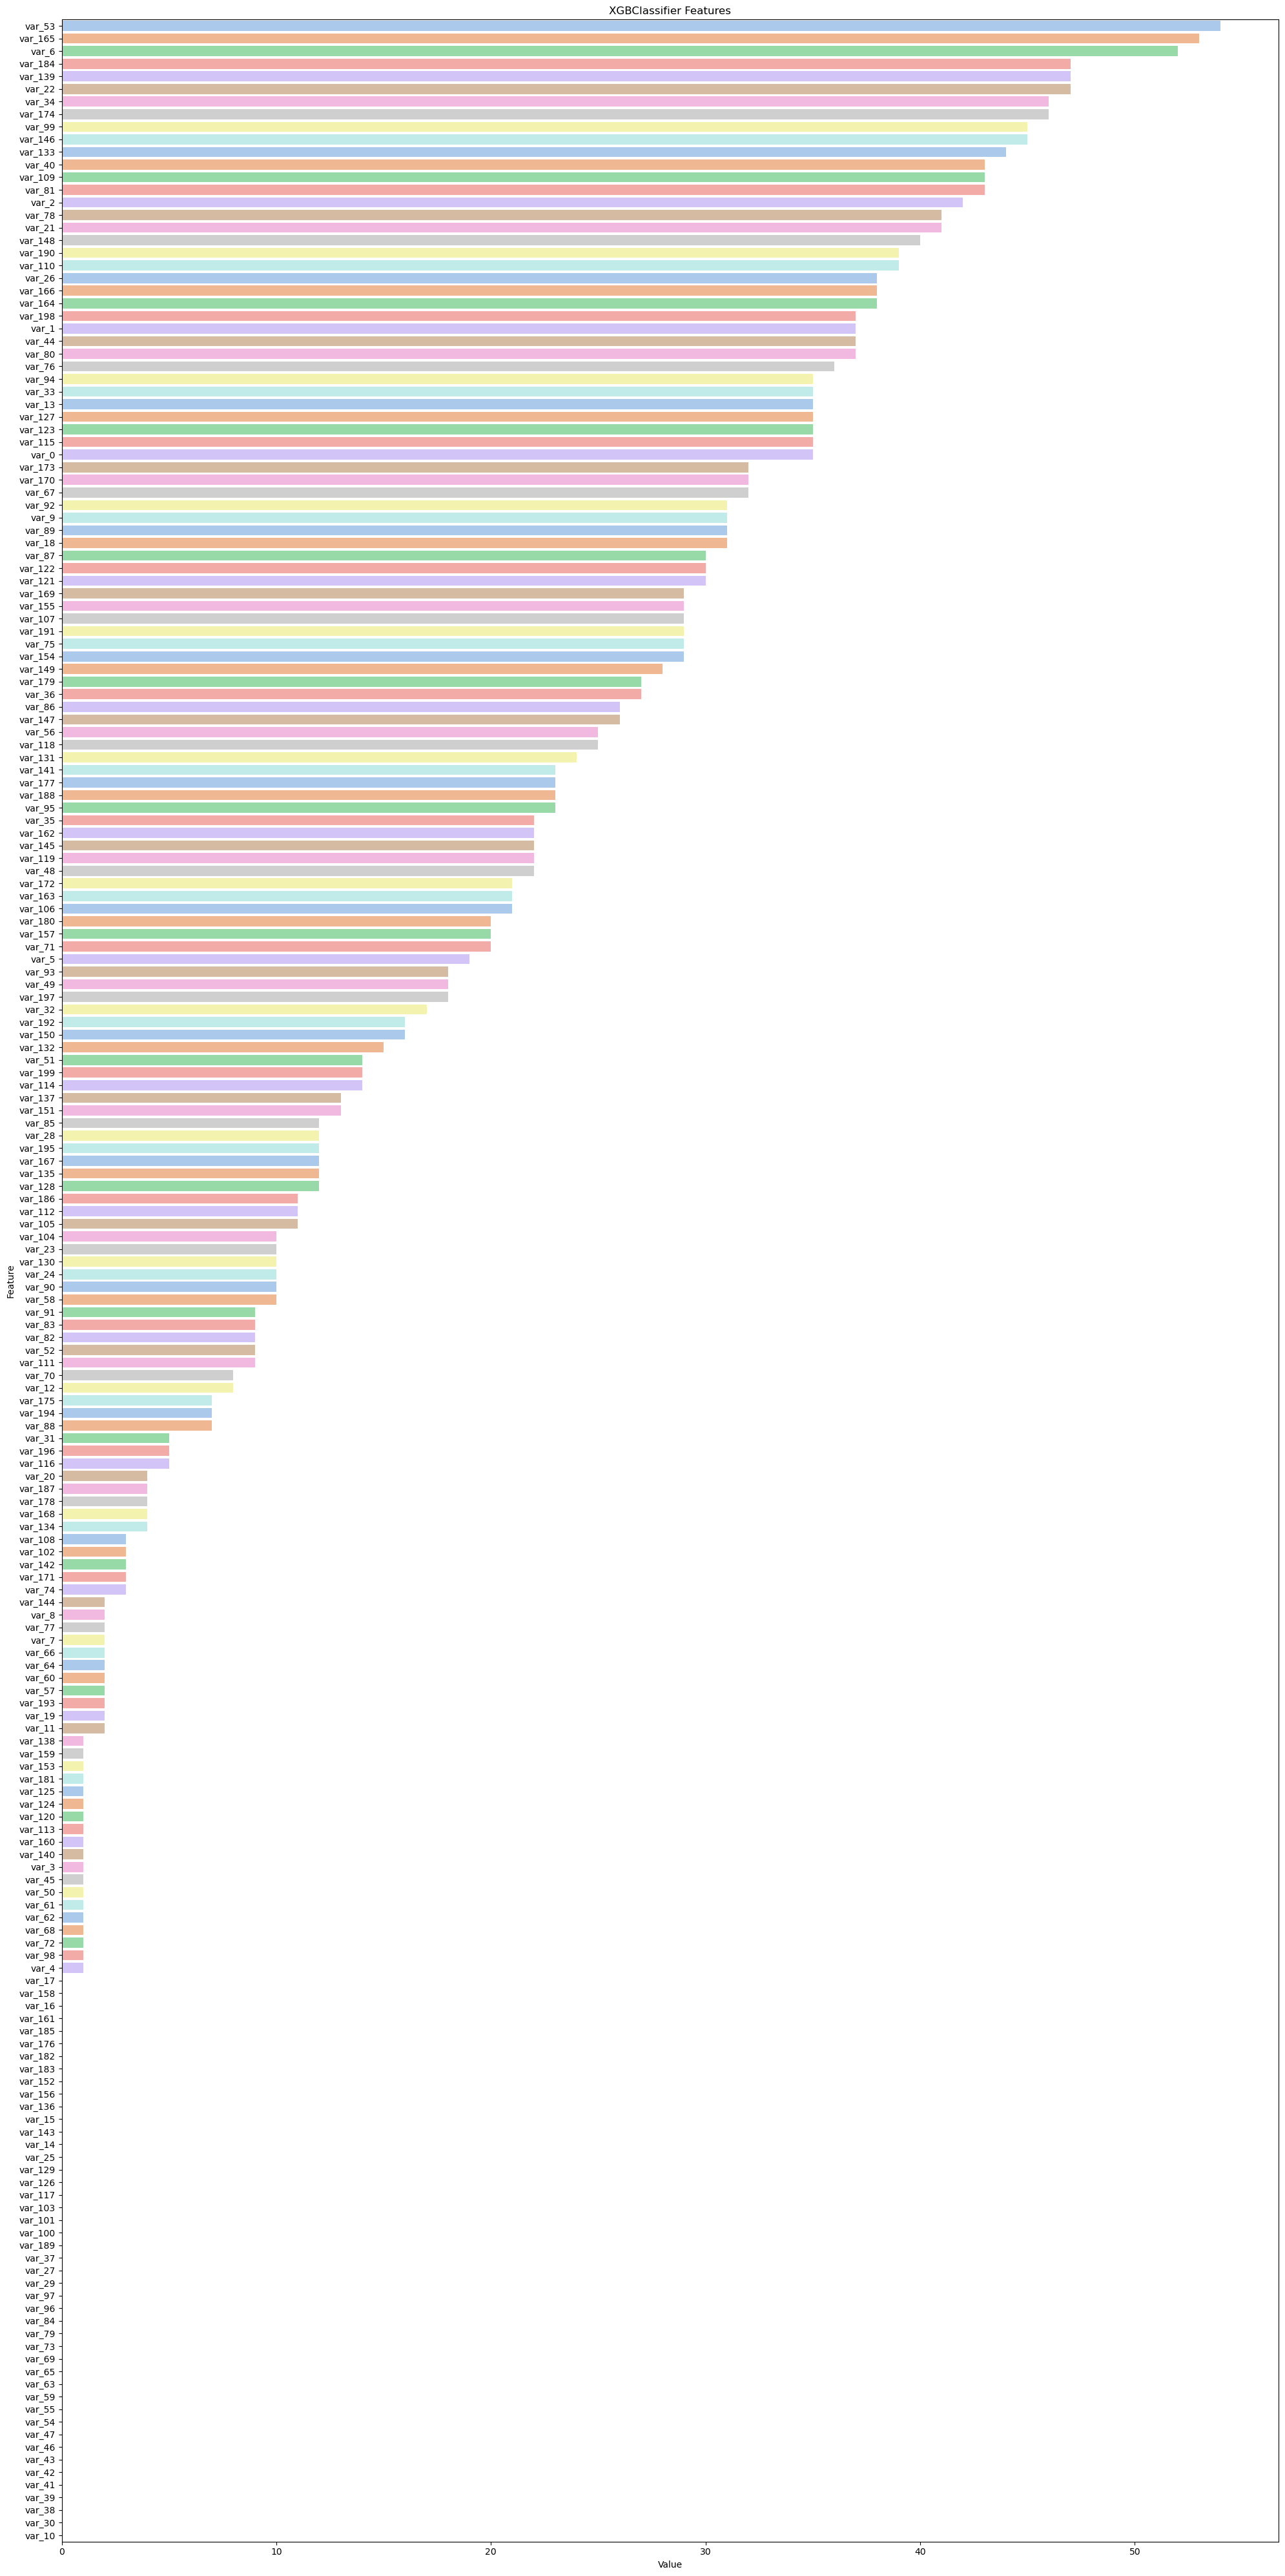

In [29]:
feature_imp = pd.DataFrame(sorted(zip(lgm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,40))
sns.barplot(x="Value", y="Feature",palette='pastel' ,data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBClassifier Features')
plt.tight_layout()
plt.show()

In [30]:
feature_imp.loc[feature_imp.Value >= 0].sort_values(by=['Value'], ascending = False).head(50)

,Value,Feature
0,54,var_53
1,53,var_165
2,52,var_6
4,47,var_184
5,47,var_139
3,47,var_22
6,46,var_34
7,46,var_174
8,45,var_99
9,45,var_146


## RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [32]:
y_pred = clf.predict(x_test)

In [33]:
print(confusion_matrix(y_test, y_pred))

[[35903     0]
 [ 4097     0]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



In [35]:
print(accuracy_score(y_test, y_pred))

0.897575


In [36]:
from collections import Counter

print(Counter(y_pred))

Counter({0: 40000})


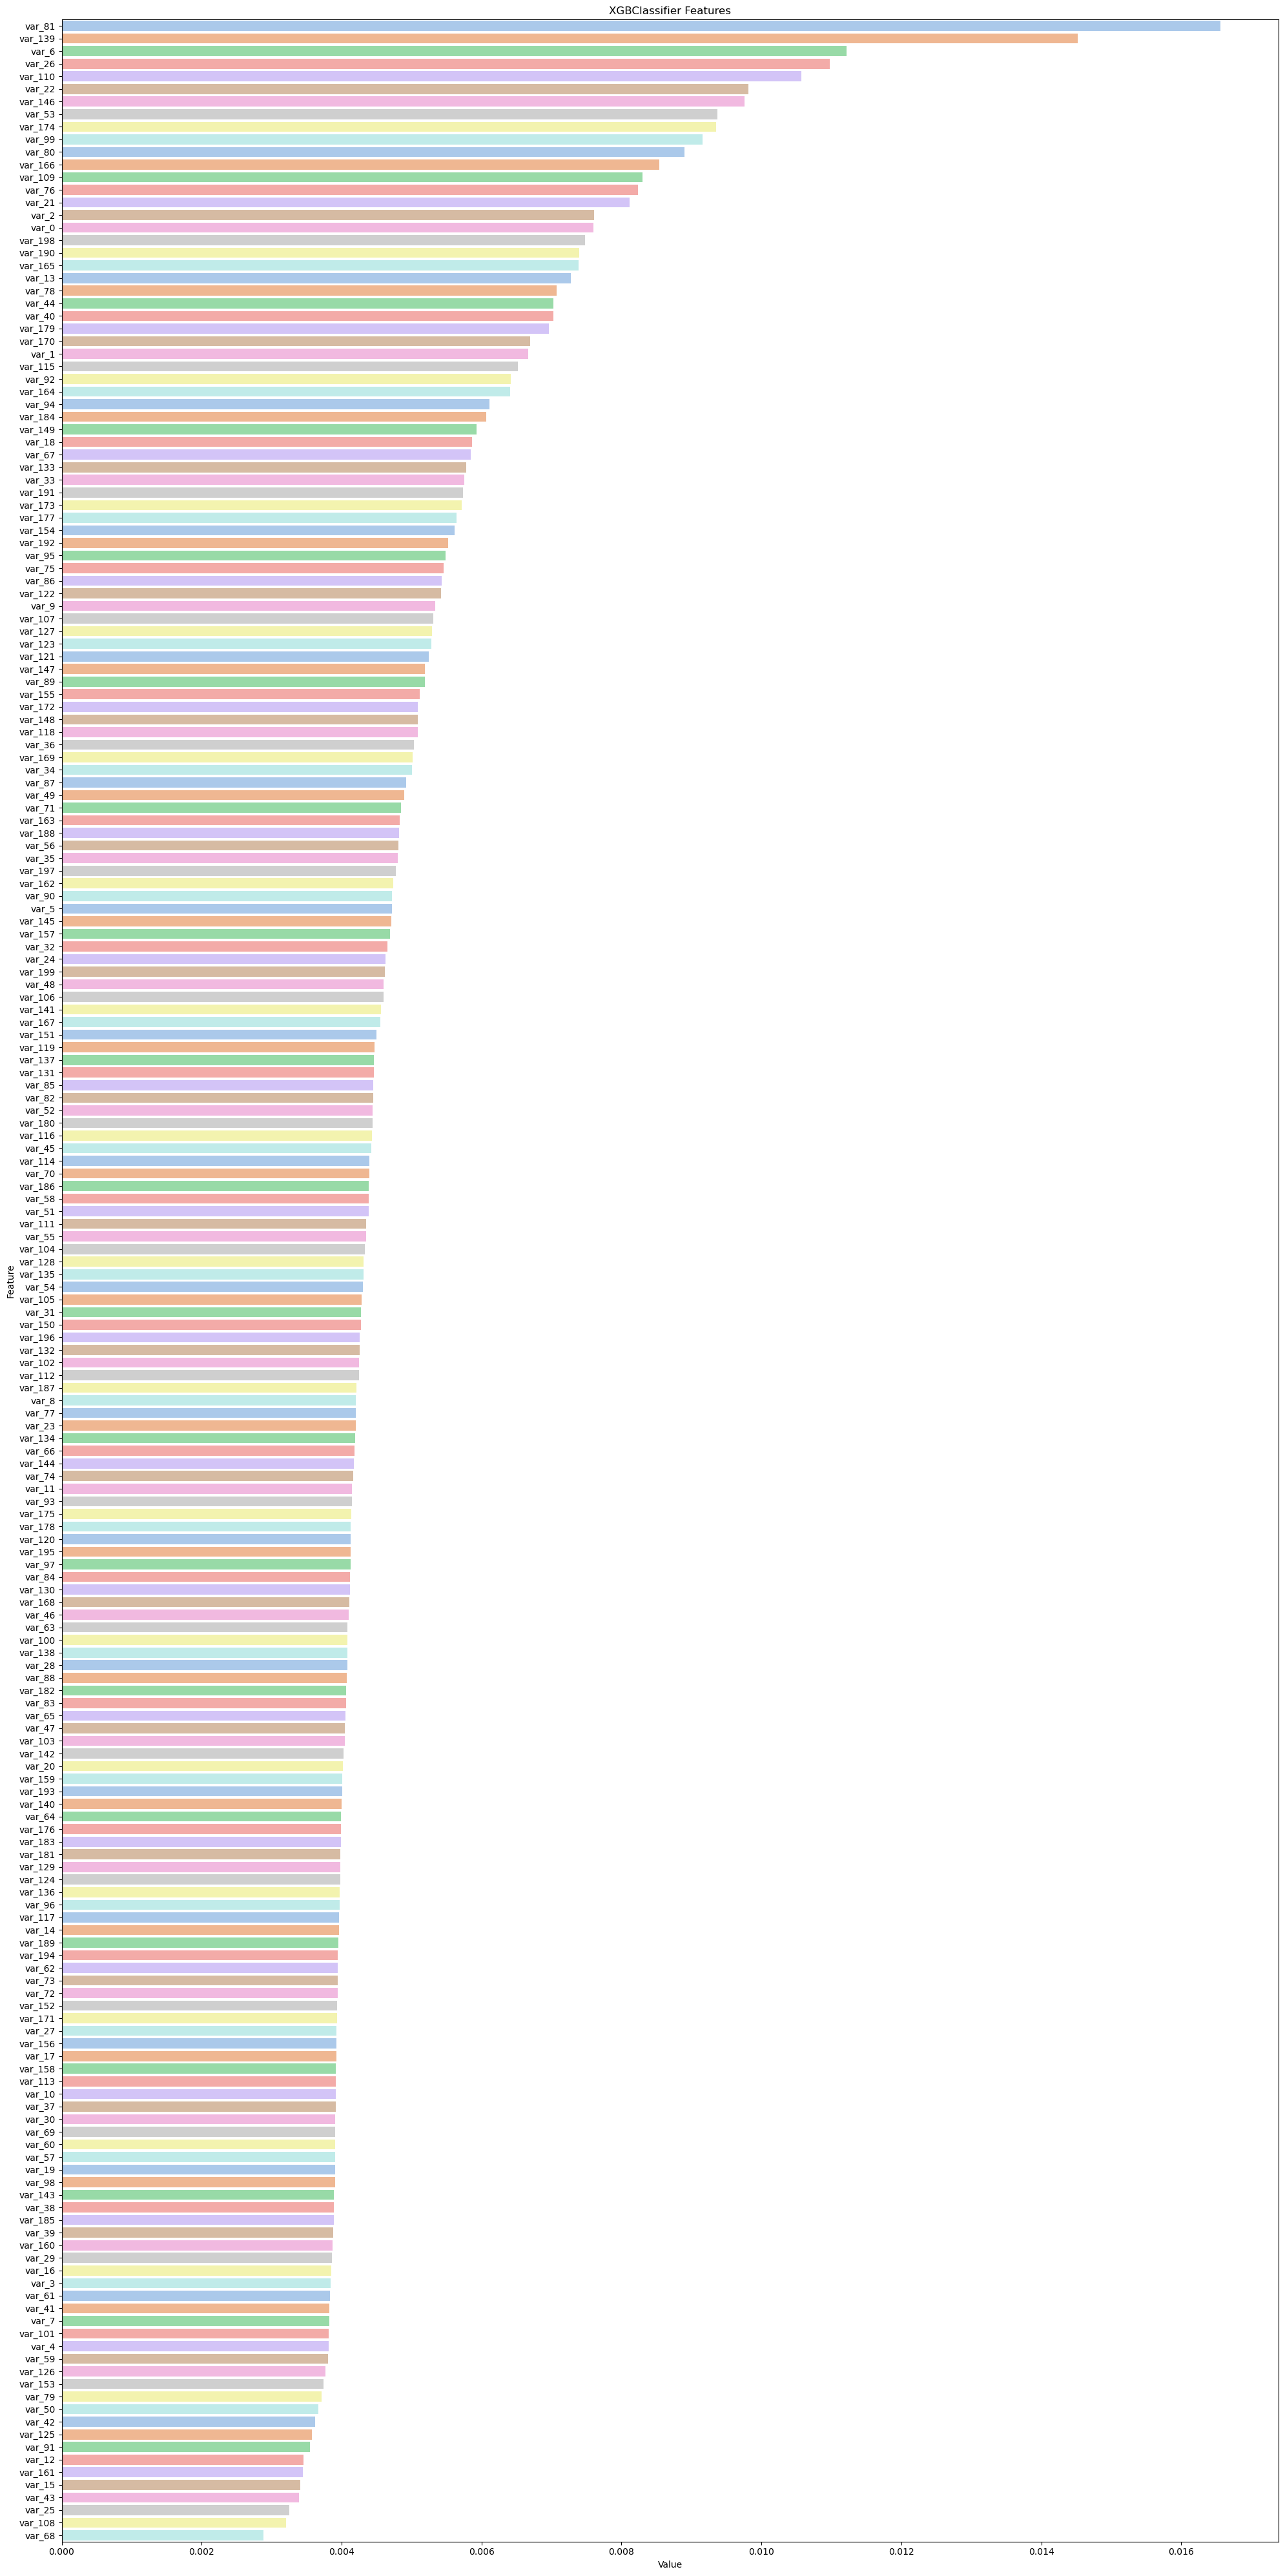

In [37]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,40))
sns.barplot(x="Value", y="Feature",palette='pastel' ,data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBClassifier Features')
plt.tight_layout()
plt.show()

In [38]:
feature_imp.loc[feature_imp.Value >= 0].sort_values(by=['Value'], ascending = False).head(50)

,Value,Feature
0,0.016562,var_81
1,0.014518,var_139
2,0.011217,var_6
3,0.010975,var_26
4,0.010570,var_110
5,0.009810,var_22
6,0.009762,var_146
7,0.009373,var_53
8,0.009353,var_174
9,0.009161,var_99


## Submission

In [39]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]))
y_pred = xgb_model.fit(x,y).predict(test)
solution = pd.DataFrame({'ID_code': df_test.ID_code, 'target': y_pred})
solution.to_csv('xgb_solution.csv', index = False)

In [40]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier()
y_pred = lgm.fit(x,y).predict(test)
solution = pd.DataFrame({'ID_code': df_test.ID_code, 'target': y_pred})
solution.to_csv('lgm_solution.csv', index = False)

[LightGBM] [Info] Number of positive: 20098, number of negative: 179902
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100490 -> initscore=-2.191792
[LightGBM] [Info] Start training from score -2.191792


In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced')
y_pred = clf.fit(x,y).predict(test)
solution = pd.DataFrame({'ID_code': df_test.ID_code, 'target': y_pred})
solution.to_csv('clf_solution.csv', index = False)

## Results

<img src="images/results.png">

## Save Best Model

In [42]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]))
y_pred = xgb_model.fit(x,y)

In [43]:
from joblib import dump
dump(xgb_model, 'xgb_model.joblib')

['xgb_model.joblib']

In [45]:
test_sample = test.sample(10)
test_sample.to_csv('test_sample.csv', index = False)